In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
mpl.rcParams['pdf.fonttype'] = 42
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')

In [3]:
sheets=["SHA", "QIA", "JA", "ashes", "spider"]
colors = ["black", "#c95428"]

In [4]:
df = pd.read_excel("../manuscript_data.xlsx", sheet_name=sheets[1])
df.head(3)

,sample,depth,lithology,age,d13C,Hg,TOC,Hg_TOC,Al,Fe,V,d202Hg,d202_se,D199Hg,D199_se,D200Hg,D200_se,D201Hg,D201_se
0,Q156c,0.1,rock,Middle Smithian,-2.14,6.42,NaN,NaN,2.560434,1.472413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q157,0.7,rock,Middle Smithian,-2.24,4.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q22,1.4,rock,Middle Smithian,-2.28,8.15,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Hg_TOC=df["Hg_TOC"]
depth = df["depth"]
TOC = df["TOC"]
d202Hg=df["d202Hg"]
err202=df["d202_se"]
D199 = df["D199Hg"]
err199=df["D199_se"]
D200 = df["D200Hg"]
err200=df["D200_se"]
d13C = df["d13C"]
Hg=df["Hg"]

In [6]:
# plt.rcParams['axes.spines.left']=False
# plt.rcParams['axes.spines.right']=False


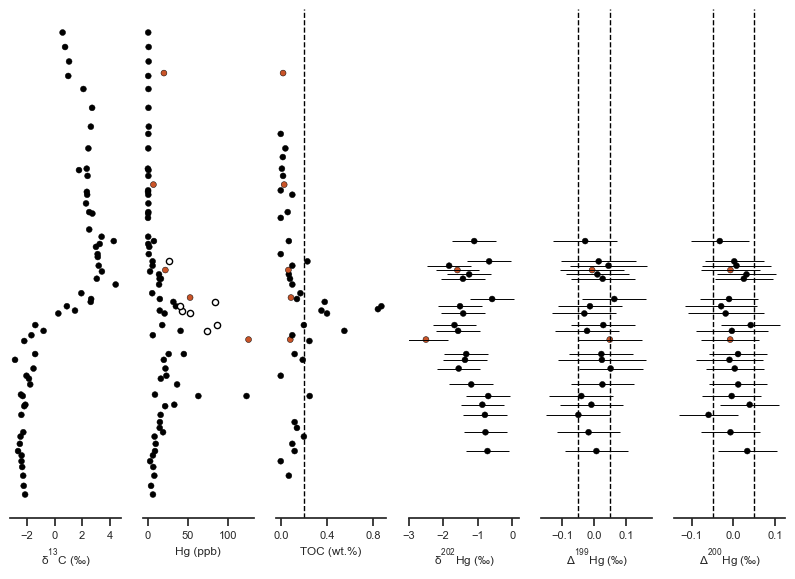

In [7]:
fig, axes = plt.subplots(figsize=(10, 6.6),  # constrained_layout=True,
                         ncols=6, nrows=1, sharey=True)
ax0, ax1, ax2, ax3, ax4, ax5 = axes
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])
ax= [ax0, ax1, ax2, ax3, ax4, ax5]
# d13C
c= sns.scatterplot(data=df, x=d13C, y=depth, ax=ax0,
                   color="black", legend=False, edgecolor="black",
                   size=20)
c.set_xlabel(r"$\delta^{13}C\;(‰)$", fontsize=8.5)
c.set_xticks([-2, 0, 2, 4])

# Hg
Hg = sns.scatterplot(data=df, x=df["Hg"], y=df["depth"], ax=ax1,
                    hue="lithology", color="black", legend=False,
                    edgecolor="black", size=20, palette=colors)
ax1.scatter(Hg_TOC, depth, s=20, color="white",edgecolor="black")
Hg.set_xticks([0, 50, 100])
Hg.set_xlabel("Hg (ppb)", fontsize=8.5)

#TOC 
om = sns.scatterplot(data=df, x=TOC, y=df["depth"], ax=ax2,
                     hue="lithology", color="black", legend=False,
                     edgecolor="black", size=20, palette=colors)
om.set_xticks([0, .4, .8])
om.set_xlabel("TOC (wt.%)", fontsize=8.5)
om.axvline(x=0.2, linestyle="--", color="black",linewidth=1)

# mdf
mdf = sns.scatterplot(data=df, x=d202Hg, y=depth, ax=ax3,
                    hue="lithology", color="black", legend=False,
                    edgecolor="black", size=20, palette=colors)
ax3.errorbar(xerr=err202, y=depth,x=d202Hg, ecolor="black", color="black",
             linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')
mdf.set_xticks([0, -1, -2, -3])
mdf.set_xlim(-3,0.2)
mdf.set_xlabel(r"$\delta^{202}Hg\;(‰)$", fontsize=8.5)

# mif
mif = sns.scatterplot(data=df, x=D199, y=depth, ax=ax4,
                    hue="lithology", color="black", legend=False,
                    edgecolor="black", size=20, palette=colors)
ax4.errorbar(xerr=err199, y=depth,x=D199, ecolor="black", color="black",
             linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')
# mif.set_xticks([0, -1, -2, -3])
# mif.set_xlim(-3,0.2)
mif.set_xlabel(r"$\Delta^{199}Hg\;(‰)$", fontsize=8.5)
mif.axvline(x=0.05, linestyle="--", color="black", linewidth=1)
mif.axvline(x=-0.05, linestyle="--", color="black", linewidth=1)

# mif2
mif2 = sns.scatterplot(data=df, x=D200, y=depth, ax=ax5,
                    hue="lithology", color="black", legend=False,
                    edgecolor="black", size=20, palette=colors)
ax5.errorbar(xerr=err200, y=depth,x=D200, ecolor="black", color="black",
             linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')
# mif.set_xticks([0, -1, -2, -3])
# mif.set_xlim(-3,0.2)
mif2.set_xlabel(r"$\Delta^{200}Hg\;(‰)$", fontsize=8.5)
mif2.axvline(x=0.05, linestyle="--", color="black", linewidth=1)
mif2.axvline(x=-0.05, linestyle="--", color="black", linewidth=1)

for i in range(6):
    ax[i].tick_params(labelsize=8)
    
# plt.savefig("../plots/qiakong_all.pdf", dpi=600)
